#Tarea 5.6


Un cierto sensor se deja abierto por un segundo. El sensor consiste en $r$ pixeles y en promedio el sensor es golpeado por $2$ partículas por segundo, tal que la probabilidad de detectar una partícula en un pixel dado es de $2/r$ (para $r \gg 2$). Grafique la distribución de probabilidad de observar $n$ partículas para un pixel dado, en función de $n$, para diferentes valores de $r$:

* Usando la distribución binomial.

* ¿Cuándo es posible usar la distribución de Poisson?

Como tenemos un ejercico de probabilidad, primero tenemos que definir las variables del ejercicio: 
- n : cantidad de particulas.  
- Probabilidad: en este caso es un promedio de cuando el sensor es golpeado por 2 particulas en un segundo  2/r, cuando r≫2. 
- r : cantidad de pixeles. 

Debido a que tenemos una distribucion binomial, usare el codigo expuesto en la clase numero 10. 

In [17]:
import numpy as np 
import matplotlib.pyplot as plt

def prob(evento, dist):
    '''
    Calcula la probabilidad de un evento a partir de una distribución. El evento debe ser una función que
    regresa verdadero o falso y la distribución debe ser un diccionario (evento: frecuencia)
    '''
    
    conjunto = {e for e in dist.keys() if evento(e)}
    total = sum(d for d in dist.values())
    frec = sum(dist[e] for e in conjunto)
    return frec/total



In [18]:
def realizar_experimento(muestra, dist):
    '''
    Definimos una función que simula realizar un experimento.
    Toma una muestra que es una lista con todos los posibles resultados de tener n-1 particulas
    y regresa una lista con todos los posibles resultados al tener n particulas.
    muestra y dist son la distribución de n-1 particulas y la distribución de un experimento.
    '''
    nueva = {}
    if len(muestra) == 0:
        return {e:p for e, p in dist.items()}
    for e, prob_e in muestra.items():
        for res, prob_r in dist.items():
            nuevo_evento = e + res
            nueva_prob = prob_e*prob_r
            nueva[nuevo_evento] = nueva_prob
    return nueva

def r_experimentos(cantidad_pixeles, prob_experimento):
    '''
    Se crea una funcion que simule tener una cantidad r de pixeles y la probabilidad de detectar una partícula en un pixel.
    '''
    prob_experimento = (2/cantidad_pixeles)
    dist_un_experimento = {'+': prob_experimento, '-': (1-prob_experimento)}
    muestra = {}
    for i in range(cantidad_pixeles):
        muestra = realizar_experimento(muestra, dist_un_experimento)
    return muestra

def n_exitos(cantidad_particulas, e):
    return e.count('+') == cantidad_particulas

In [19]:
def binomial_fuerza_bruta(cantidad_particulas, cantidad_pixeles, prob_experimento):
    '''
    Calcula la distribución polinomial a fuerza bruta: Simula la realización de un experimento
    con una cantidad definida de pixeles
    y cuenta los casos en los que hay n partículas por segundo.
    '''
    dist = r_experimentos(cantidad_pixeles, prob_experimento)
    def evento(e):
        return n_exitos(cantidad_particulas, e)
    return prob(evento, dist)


In [20]:
from scipy.special import comb
def binomial(cantidad_particulas, cantidad_pixeles, prob_experimento):
    p = 2/cantidad_pixeles
    return comb(cantidad_pixeles, cantidad_particulas)*prob_experimento**cantidad_particulas*(1-p)**(cantidad_pixeles - cantidad_particulas)

In [21]:
def probs(cantidad_particulas, cantidad_pixeles, prob_experimento):
    prob_experimento= 2/cantidad_pixeles
    return [binomial(cantidad_particulas, cantidad_pixeles, prob_experimento) for cantidad_particulas in range(cantidad_pixeles+1)]

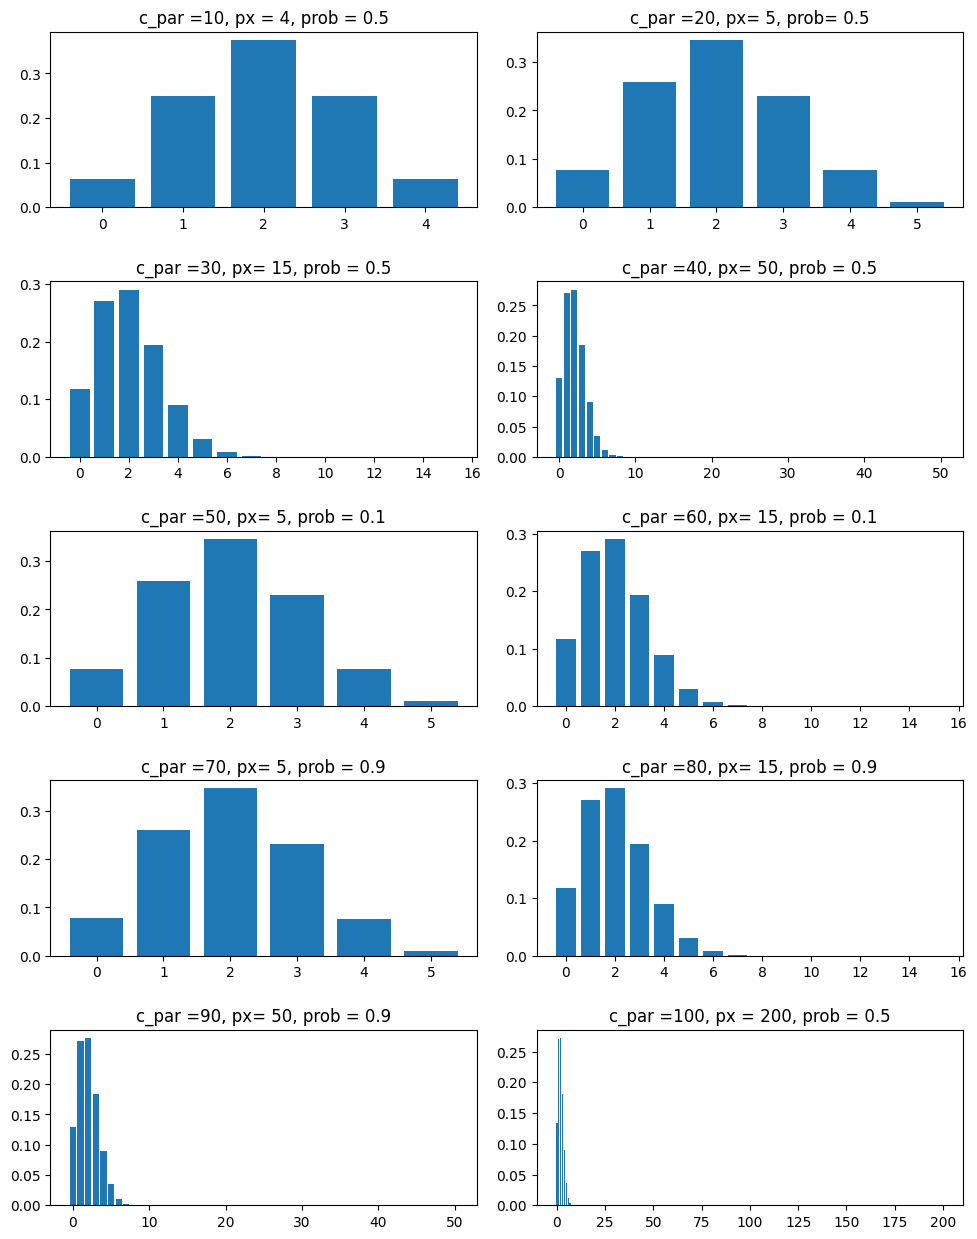

In [23]:
fig = plt.figure(figsize=(10,20), dpi= 100)

ax1 = fig.add_subplot(8,2,1)
ax2 = fig.add_subplot(8,2,2)
ax3 = fig.add_subplot(8,2,3)
ax4 = fig.add_subplot(8,2,4)
ax5 = fig.add_subplot(8,2,5)
ax6 = fig.add_subplot(8,2,6)
ax7 = fig.add_subplot(8,2,7)
ax8 = fig.add_subplot(8,2,8)
ax9 = fig.add_subplot(8,2,9)
ax10 = fig.add_subplot(8,2,10)

ax1.bar(range(4+1), probs(10, 4,0.5))
ax2.bar(range(5+1), probs(20, 5,0.5))
ax3.bar(range(15+1), probs(30, 15,0.5))
ax4.bar(range(50+1), probs(40, 50,0.5))
ax5.bar(range(5+1), probs(50, 5,0.1))
ax6.bar(range(15+1), probs(60, 15,0.1))
ax7.bar(range(5+1), probs(70, 5,0.9))
ax8.bar(range(15+1), probs(80, 15,0.9))
ax9.bar(range(50+1), probs(90, 50,0.9))
ax10.bar(range(200+1), probs(100, 200,0.5)) 

ax1.set_title('c_par =10, px = 4, prob = 0.5')
ax2.set_title('c_par =20, px= 5, prob= 0.5')
ax3.set_title('c_par =30, px= 15, prob = 0.5')
ax4.set_title('c_par =40, px= 50, prob = 0.5')
ax5.set_title('c_par =50, px= 5, prob = 0.1')
ax6.set_title('c_par =60, px= 15, prob = 0.1')
ax7.set_title('c_par =70, px= 5, prob = 0.9')
ax8.set_title('c_par =80, px= 15, prob = 0.9')
ax9.set_title('c_par =90, px= 50, prob = 0.9')
ax10.set_title('c_par =100, px = 200, prob = 0.5')

fig.tight_layout(pad=2.0)


fig.show()

La distribucuion de poisson deberia poder usarse ya que estamos trabajando con intervalos continuos de tiempo. ademas como lo visto en clase, poisson se trabaja cuando se hace tender r al infinito entonces, en este caso si hacemos tender los pixeles del sensor al infinito se podria usar la distribucion de poisson. 